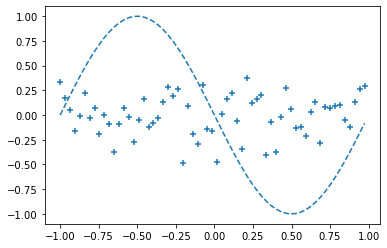

Epoch:0/2001 Error:0.2757186818477085


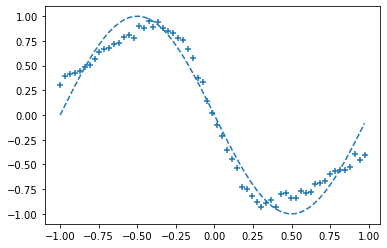

Epoch:200/2001 Error:0.010090905763843411


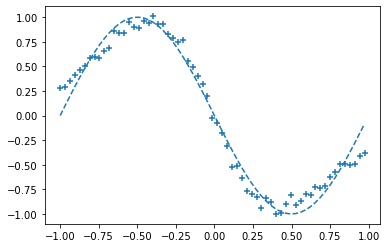

Epoch:400/2001 Error:0.006502985356250221


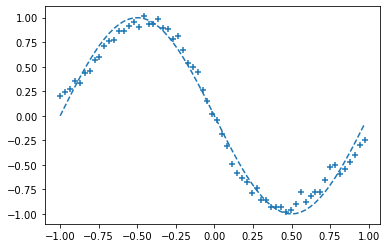

Epoch:600/2001 Error:0.00412131065694714


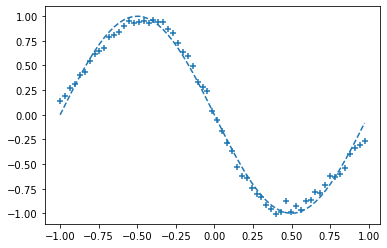

Epoch:800/2001 Error:0.002167284361558421


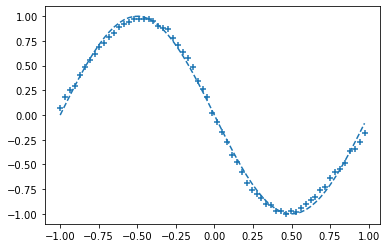

Epoch:1000/2001 Error:0.0009959927140625738


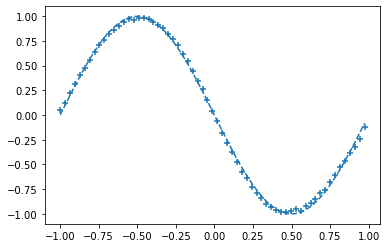

Epoch:1200/2001 Error:0.0003432294895125009


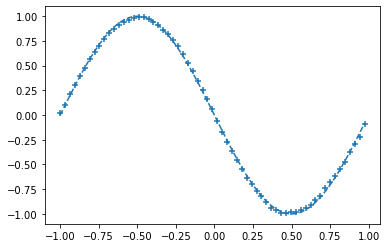

Epoch:1400/2001 Error:0.00011564125218762304


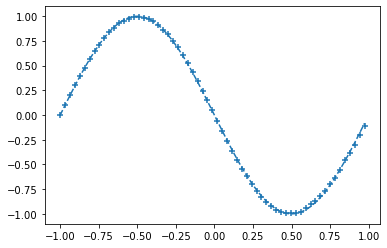

Epoch:1600/2001 Error:4.857833000021719e-05


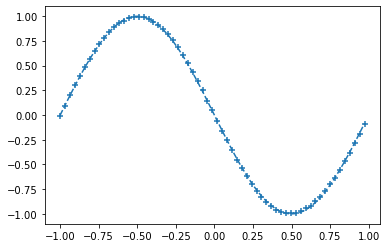

Epoch:1800/2001 Error:2.2547397626794148e-05


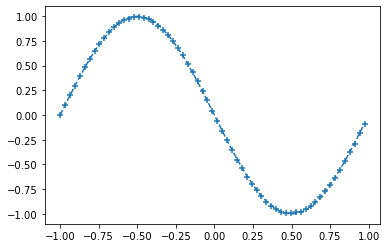

Epoch:2000/2001 Error:1.434569673236242e-05


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Error
error = []

# —準備輸入與正解—
input_data = np.arange(0, np.pi * 2, 0.1) #輸入
correct_data = np.sin(input_data) #正確答案
input_data = (input_data-np.pi)/np.pi # 輸入為-1.0～1.0的範圍內
n_data = len(correct_data) #資料的數量

# —各設定值—
n_in = 1 #輸入層的神經元數量
n_mid = 3 #中間層的神經元數量
n_out = 1 #輸出層的神經元數量

wb_width = 0.01 #權重與偏值的範圍
eta = 0.1 #學習率
epoch = 2001
interval = 200 #顯示進度的間隔

# —中間層—
class MiddleLayer:
  def __init__(self, n_upper, n): #初期設定
    self.w1 = wb_width * np.random.randn(n_upper, n) #權重（矩陣）
    self.b1 = wb_width * np.random.randn(n)  #偏值（向量）

  def forward(self, x): #前向傳播
    self.x = x
    u1 = np.dot(x, self.w1) + self.b1
    self.y1 = 1/(1+np.exp(-u1)) #sigmoid函數
    
  def backward(self, grad_y1): #反向傳播
    delta1 = grad_y1 * (1-self.y1)*self.y1 #sigmoid函數的微分
        
    self.grad_w1= np.dot(self.x.T, delta1)
    self.grad_b1 = np.sum(delta1, axis=0)
                
  def update(self, eta): #更新權重與偏值
    self.w1 -= eta * self.grad_w1
    self.b1 -= eta * self.grad_b1

# —輸出層—
class OutputLayer:
  def __init__(self, n_upper, n): #初期設定
    self.w2 = wb_width * np.random.randn(n_upper, n) #權重（矩陣）
    self.b2 = wb_width * np.random.randn(n) #偏值（向量）
    
  def forward(self, y1): #前向傳播
    self.y1 = y1
    u2 = np.dot(y1, self.w2) + self.b2
    self.y2 = u2 #恆等函數
    
  def backward(self, t): #反向傳播
    delta2 = self.y2 - t
               
    self.grad_w2 = np.dot(self.y1.T, delta2)
    self.grad_b2 = np.sum(delta2, axis=0)
        
    self.grad_y1 = np.dot(delta2, self.w2.T) 

  def update(self, eta): #更新權重與偏值
    self.w2 -= eta * self.grad_w2
    self.b2 -= eta * self.grad_b2

# —各層的初始化—
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# —學習—
for i in range(epoch):
  #索引洗牌
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)
    
  #顯示結果用
  total_error = 0
  plot_x = []
  plot_y2 = []
    
  for idx in index_random:    
    x = input_data[idx:idx+1] #輸入
    t = correct_data[idx:idx+1] #正確答案
        
    #前向傳播
    middle_layer.forward(x.reshape(1, 1)) #把輸入轉換成陣列
    output_layer.forward(middle_layer.y1)  

    #反向傳播
    output_layer.backward(t.reshape(1, 1)) #反向傳播
    middle_layer.backward(output_layer.grad_y1)
        
    #更新權重與偏值
    middle_layer.update(eta)
    output_layer.update(eta)
        
    if i%interval == 0:
            
      y2 = output_layer.y2.reshape(-1) #將矩陣恢復成向量

      #誤差計算
      total_error += 1.0/2.0 * np.sum(np.square(y2 - t)) #計算均方誤差
            
      #輸出的記錄
      plot_x.append(x)
      plot_y2.append(y2)
            
  if i%interval == 0:
 
    #顯示輸出的圖表
    plt.plot(input_data, correct_data, linestyle="dashed")
    plt.scatter(plot_x, plot_y2, marker="+")
    plt.show()
        
    #顯示epoch次數與誤差
    print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))